# Week 4 - Multiclass (One-vs-All) Logistic Regression and Neural Networks

We will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you’ve learned can be used for this classification task.

The handwritten dataset can be loaded from the .mat files.

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

The loaded dataset contains 5000 training entries. Each entry is an unrolled 20x20 image (400 pixels in a 1 dimensional vector).

In [2]:
# Load the MATLAB/Octave .mat datafile
data = sio.loadmat('./ex3/ex3data1.mat')
X = data['X']
y = data['y']
print(f'X size: {X.shape}, y size: {y.shape}')

X size: (5000, 400), y size: (5000, 1)


Let's visualize 25 of the training data samples to see what we are dealing with

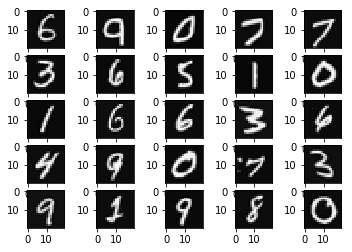

In [3]:
nRow = 5
nCol = 5
fig,ax = plt.subplots(nRow,nCol)
for i in range(nRow):
    for j in range(nCol):
        # Generate random index to select from the dataset
        randIndex = int(np.random.rand()*X.shape[0])
        ax[i,j].imshow(np.transpose(np.reshape(X[randIndex,:],(20,20))),cmap='gray')

The above numbers from the training dataset look pretty reasonable

## Using One-vs-All Logistic Regression to Predict Handwritten Digits

Lets use scikit-learn's One-vs-All Logistic Regression model for fitting

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
print(f'Classes: {clf.classes_}')

/Users/chrisbenson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classes: [ 1  2  3  4  5  6  7  8  9 10]


Let's use the trained model (clf) to see how well it predicts on the training data

In [6]:
predictions = clf.predict(X)
reshapeY = np.reshape(y,(len(y),))
compareWithTruth = (predictions==reshapeY)
print(f'Model predicition accuracy on training dataset: {sum(compareWithTruth)/float(len(compareWithTruth))*100}%')

Model predicition accuracy on training dataset: 96.26%


This is better than the 94% we observed in the Octave logistic regression we built by hand (not surprising). Not bad at all!

### Lets compare this performance to a couple more logistic regression models we can find on scikit-learn

The first one up is the logistic regression with cross validation. 

In [7]:
from sklearn.linear_model import LogisticRegressionCV
# create LogisticRegressionCV model
clf_cv = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(X, y)
predictions = clf_cv.predict(X)
reshapeY = np.reshape(y,(len(y),))
compareWithTruth = (predictions==reshapeY)
print(f'Model predicition accuracy on training dataset: {sum(compareWithTruth)/float(len(compareWithTruth))*100}%')

/Users/chrisbenson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model predicition accuracy on training dataset: 94.82000000000001%


## Neural Network

Let's use scikit-learn to construct a neural network for performance comparison. We will use the same method as the homework where we have 1 hidden layer with 25 nodes and an output layer with 10 nodes.

In [16]:
from sklearn.neural_network import MLPClassifier

In [29]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2, 25), random_state=1)
clf.fit(X, np.reshape(y,(len(y),)))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [30]:
predictions = clf_cv.predict(X)
reshapeY = np.reshape(y,(len(y),))
compareWithTruth = (predictions==reshapeY)
print(f'Model predicition accuracy on training dataset: {sum(compareWithTruth)/float(len(compareWithTruth))*100}%')

Model predicition accuracy on training dataset: 94.82000000000001%
